In [21]:
!pip install import-ipynb

In [22]:
import yfinance as yf
import import_ipynb
import multipleStocks

In [34]:
import pandas as pd

tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [35]:
import numpy as np
import re

tickers['Founded_clean'] = tickers['Founded'].astype(str).apply(
    lambda x: int(re.search(r'\b(18|19|20)\d{2}\b', x).group()) if re.search(r'\b(18|19|20)\d{2}\b', x) else np.nan
)

tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Founded_clean
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,1902.0
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,1916.0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1888.0
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2013.0
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1989.0
...,...,...,...,...,...,...,...,...,...
497,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011,2011.0
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997,1997.0
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969,1969.0
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927,1927.0


Using IQR to detect outliers

In [36]:
Q1 = tickers['Founded_clean'].quantile(0.25)
Q3 = tickers['Founded_clean'].quantile(0.75)
IQR = Q3 - Q1
outliers = tickers[(tickers['Founded_clean'] < Q1 - 1.5 * IQR) |
     (tickers['Founded_clean'] > Q3 + 1.5 * IQR)]

outliers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Founded_clean
114,CL,Colgate-Palmolive,Consumer Staples,Household Products,"New York City, New York",1957-03-04,21665,1806,1806.0
222,HIG,Hartford (The),Financials,Property & Casualty Insurance,"Hartford, Connecticut",1957-03-04,874766,1810,1810.0


In [37]:
import re
tickers.Founded = [re.sub(r"\s*[\(\[].*$", "", x) for x in tickers.Founded]
tickers.Founded = [re.sub(r"/.*", "",x) for x in tickers.Founded]
tickers.Founded

0      1902
1      1916
2      1888
3      2013
4      1989
       ... 
497    2011
498    1997
499    1969
500    1927
501    1952
Name: Founded, Length: 502, dtype: object

In [38]:
tickers['Founded'].dtype

dtype('O')

Dropping the founded column & replacing it with a numerical version of it

In [39]:
tickers.drop('Founded_clean', axis = 1, inplace = True)
tickers["Founded"] = pd.to_numeric(tickers.Founded)
tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
497,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [41]:
pharma = tickers[tickers['GICS Sub-Industry'] == 'Pharmaceuticals']
pharma = pharma[pharma['Founded'] < 2020]
pharma.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
69,BMY,Bristol Myers Squibb,Health Care,Pharmaceuticals,"New York City, New York",1957-03-04,14272,1989
263,JNJ,Johnson & Johnson,Health Care,Pharmaceuticals,"New Brunswick, New Jersey",1973-06-30,200406,1886
286,LLY,Lilly (Eli),Health Care,Pharmaceuticals,"Indianapolis, Indiana",1970-12-31,59478,1876
308,MRK,Merck & Co.,Health Care,Pharmaceuticals,"Kenilworth, New Jersey",1957-03-04,310158,1891
367,PFE,Pfizer,Health Care,Pharmaceuticals,"New York City, New York",1957-03-04,78003,1849


In [42]:
import yfinance as yf

tickers_list = [symbol for symbol in pharma['Symbol'].head().tolist() if symbol != 'BRK.B']
print("Tickers: ", tickers)

#getting for the month of march
data = yf.download(tickers_list, start='2020-03-01', end='2020-03-31', interval = '1wk')['Close']
data

C:\Users\kevin\AppData\Local\Temp\ipykernel_6024\982682433.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers_list, start='2020-03-01', end='2020-03-31', interval = '1wk')['Close']
[*********************100%***********************]  5 of 5 completed

Tickers:      Symbol             Security             GICS Sector  \
0      MMM                   3M             Industrials   
1      AOS          A. O. Smith             Industrials   
2      ABT  Abbott Laboratories             Health Care   
3     ABBV               AbbVie             Health Care   
4      ACN            Accenture  Information Technology   
..     ...                  ...                     ...   
497    XYL           Xylem Inc.             Industrials   
498    YUM          Yum! Brands  Consumer Discretionary   
499   ZBRA   Zebra Technologies  Information Technology   
500    ZBH        Zimmer Biomet             Health Care   
501    ZTS               Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipme

Ticker,BMY,JNJ,LLY,MRK,PFE
Date,,,,,
2020-03-02,49.164806,122.385628,132.770935,66.063332,26.156864
2020-03-09,44.827934,115.716125,130.809311,61.683231,24.431498
2020-03-16,39.455753,103.307823,114.881691,57.825134,21.667925
2020-03-23,43.034492,106.125580,125.872414,58.124943,23.079590
2020-03-30,45.439327,112.993202,130.199203,62.346767,24.379215


Visualizing time series for prices of the 5 pharmaceuticals

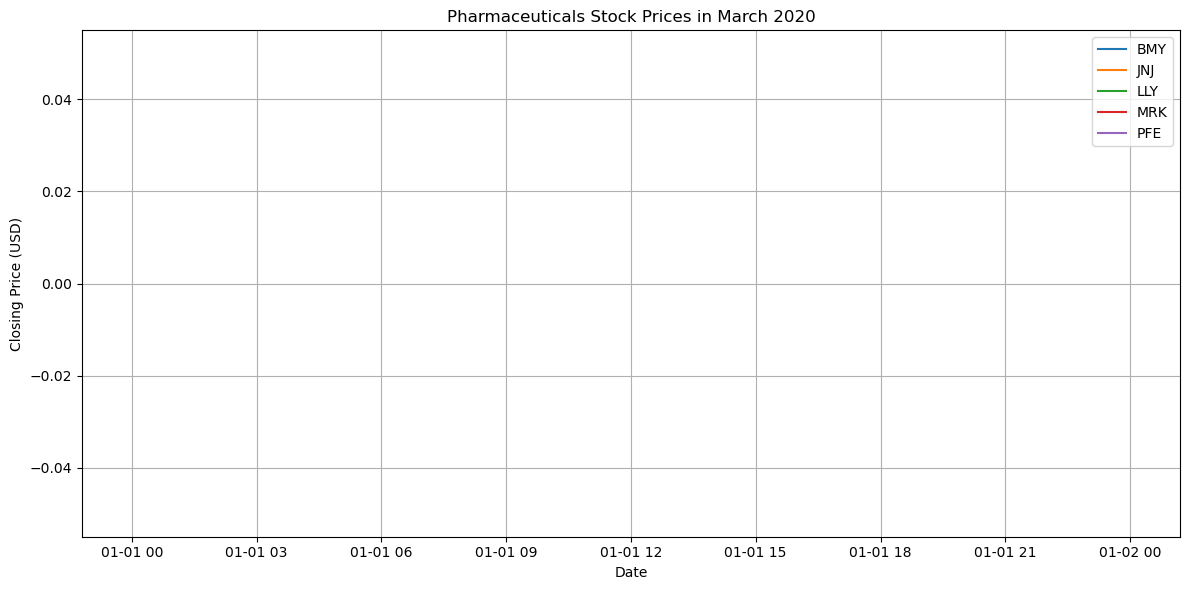

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12, 6))
for symbol in data.columns:
    plt.plot(data.index, data[symbol], label=symbol)
plt.title('Pharmaceuticals Stock Prices in March 2020')

plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')

plt.grid(True) 

plt.legend()
plt.tight_layout()
plt.show()

Finish Problems 5, 6, 7, and 8

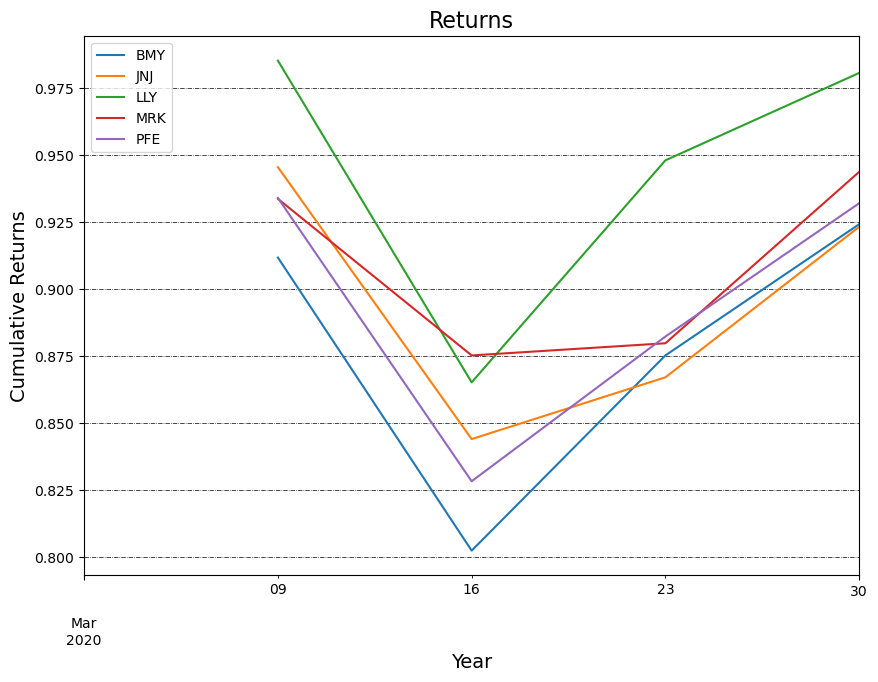

In [13]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [14]:
# Fetch the data
import yfinance as yf
data = yf.download(tickers_list, start='2020-01-01', end='2021-01-01', interval = '1mo')['Adj Close']
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_6024\1384615156.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers_list, start='2020-01-01', end='2021-01-01', interval = '1mo')['Adj Close']
[*********************100%***********************]  5 of 5 completed


KeyError: 'Adj Close'

In [ ]:
#annualized return for a 5% monthly gain
rm = 0.05
(1+rm)**12 - 1

In [ ]:
#annualized return for a 13% quarterly gain
rm = .13
(1+rm)**4 - 1